# Statistics

Load the files with revisions and create one data frame

In [2]:
import pandas as pd


data=pd.read_csv('revisions_analysed.csv', encoding='utf-8')

len(data)


11153126

We have 11,153,126 revisions for 567,220 items


### Count revision types

In [6]:
#count reivision types

revert=data['type'].value_counts()['revert']
remove=data['type'].value_counts()['remove']
restore=data['type'].value_counts()['restore']
undo=data['type'].value_counts()['undo']

print('reverts: ', revert, revert*100/len(data),'%')
print('remove: ', remove, remove*100/len(data),'%')
print('restore: ', restore, restore*100/len(data),'%')
print('undo: ', undo, undo*100/len(data),'%')


reverts:  5077 0.04552087011300688 %
remove:  574237 5.148664150301897 %
restore:  1804 0.016174837440193896 %
undo:  7230 0.0648248751067638 %


In [8]:
#count reivision types

add=data['type'].value_counts()['add']
create=data['type'].value_counts()['create']
set=data['type'].value_counts()['set']
update=data['type'].value_counts()['update']
merge=data['type'].value_counts()['merge']
protect=data['type'].value_counts()['protect']

print('add: ', add, add*100/len(data),'%')
print('create: ', create, create*100/len(data),'%')
print('set: ', set, set*100/len(data),'%')
print('update: ', update, update*100/len(data),'%')
print('merge: ', merge, merge*100/len(data),'%')
print('protect: ', protect, protect*100/len(data),'%')

add:  7401228 66.36012181696863 %
create:  1807054 16.20221989781161 %
set:  149736 1.3425473719206615 %
update:  1201239 10.770424363537183 %
merge:  5433 0.048712800339563996 %
protect:  88 0.0007890164604972633 %


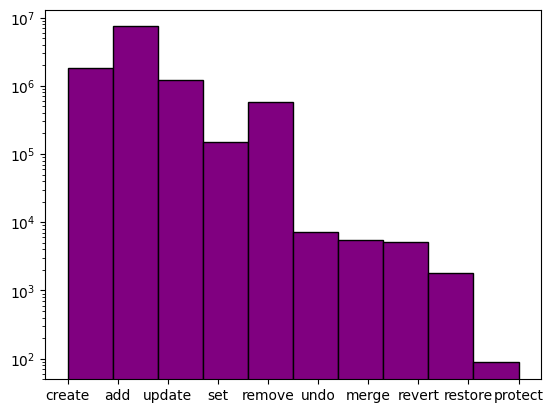

In [13]:
import matplotlib.pyplot as plt

plt.hist(data['type'],log=True,color='purple', edgecolor='black')
plt.show()


### Mean number for types of revisions

Load num_revision_types_v2.csv and num_revision_usercount_editcount.csv to calcumate the mean number for revision types.

In [5]:
import pandas as pd


df_types=pd.read_csv('/mnt/data/elisavetk/Wikidata_disagreements/num_revision_types_v2.csv', encoding='utf-8')
df_user=pd.read_csv('/mnt/data/elisavetk/Wikidata_disagreements/num_revision_usercount_editcount.csv', encoding='utf-8')

print('add: ', df_types['add'].mean())
print('create: ', df_types['create'].mean())
print('set: ', df_types['set'].mean())
print('remove : ', df_types['remove'].mean())
print('undo: ', df_types['undo'].mean())
print('merge: ', df_types['merge'].mean())
print('revert: ', df_types['revert'].mean())
print('restore: ', df_types['restore'].mean())
print('protect: ', df_types['protect'].mean())


add:  17.867047767110293
create:  4.362346374918827
set:  0.36147248327656256
remove:  1.3862456214890437
undo:  0.017453692192188567
merge:  0.013115616829897717
revert:  0.012256209579493964
restore:  0.004354973819461712
protect:  0.00021243774729081522


### Statistical tests

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


df_types=pd.read_csv('//mnt/data/elisavetk/Wikidata_disagreements/num_revision_types_v2.csv', encoding='utf-8')
df_types.columns=['item','add','create','update','set','#remove','#undo','merge','#revert','#restore','protect']
df_user=pd.read_csv('/mnt/data/elisavetk/Edit_history_items_Tushita/num_revision_usercount_editcount.csv', encoding='utf-8')
df_user.columns=['item','#editors','#edits']

df=pd.merge(df_types, df_user, on=['item'])
df


,item,add,create,update,set,#remove,#undo,merge,#revert,#restore,protect,#editors,#edits
0,Q2123546,6,4,2,0,0,0,0,0,0,0,3,6
1,Q2123580,12,6,3,0,0,0,0,0,0,0,3,7
2,Q2123765,12,6,6,0,0,0,0,0,0,0,5,8
3,Q2123937,6,6,6,0,0,0,0,0,0,0,4,6
4,Q2124144,2,8,2,2,0,0,0,0,0,0,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
414234,Q28090826,1,8,0,0,0,0,0,0,0,0,1,9
414235,Q28091236,0,6,0,0,0,0,0,0,0,0,2,6
414236,Q28091294,12,5,0,1,0,0,0,0,0,0,1,18
414237,Q28092173,1,4,1,0,0,0,0,0,0,0,1,6


check distribution

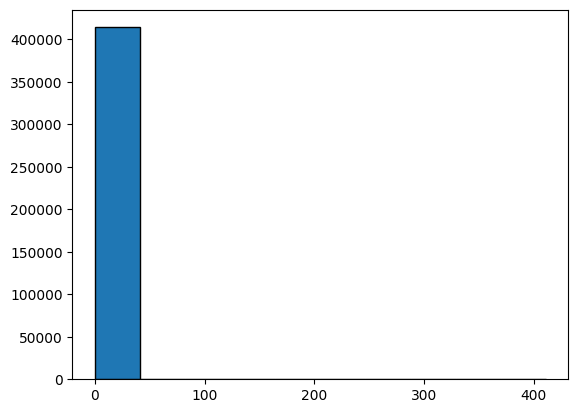

In [6]:
import math
import numpy as np
from scipy.stats import lognorm
import statsmodels.api as sm
import matplotlib.pyplot as plt

#make this example reproducible
np.random.seed(1)

#generate dataset that contains 1000 log-normal distributed values
# lognorm_dataset = lognorm.rvs(s=.5, scale=math.exp(1), size=1000)

#create Q-Q plot with 45-degree line added to plot
plt.hist(df['#remove'], edgecolor='black')

plt.show()


heatmap

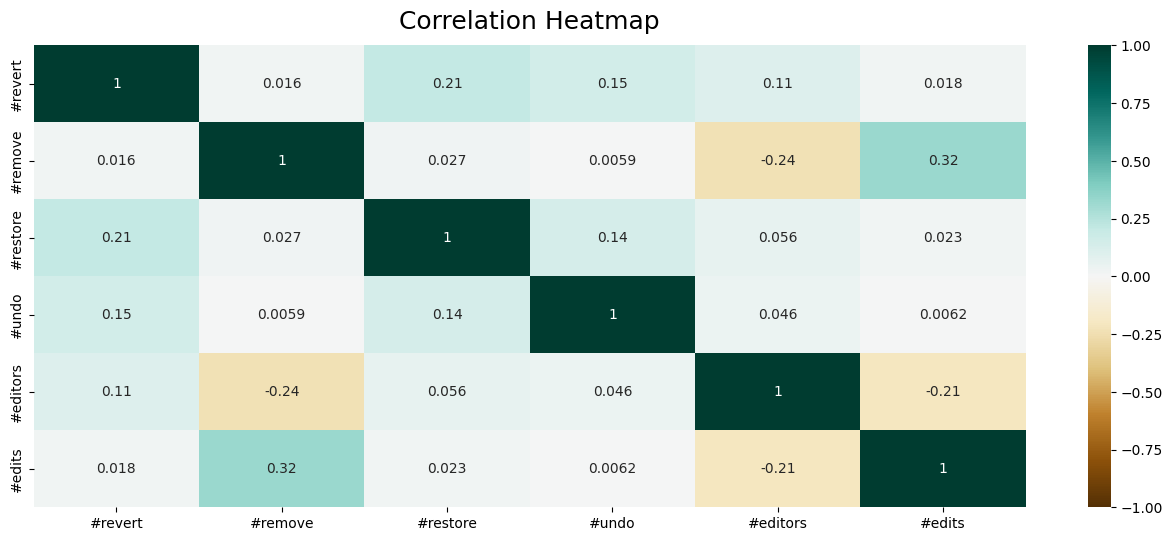

In [7]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[['#revert','#remove', '#restore','#undo', '#editors', '#edits']].corr(method='spearman'), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped

plt.savefig('/mnt/data/elisavetk/Wikidata_disagreements/heatmap_revisions_spearman.png', dpi=300, bbox_inches='tight')